<a href="https://colab.research.google.com/github/693080593/research/blob/master/3_Sets_%5B7%5D_cHB_ANN_KFold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs


# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv(r'/content/Feed Effect on Biocrude Yield Data ML 080620.csv')
Original_Oil_Yields = data['Bio-crude Oil Yield']
Original_Features = data.drop('Bio-crude Oil Yield', axis = 1)

# Success
print ("Bio-crude dataset has {} data points with {} variables each.".format(*data.shape))
data.shape

# data[:240:30]


Bio-crude dataset has 225 data points with 8 variables each.


(225, 8)

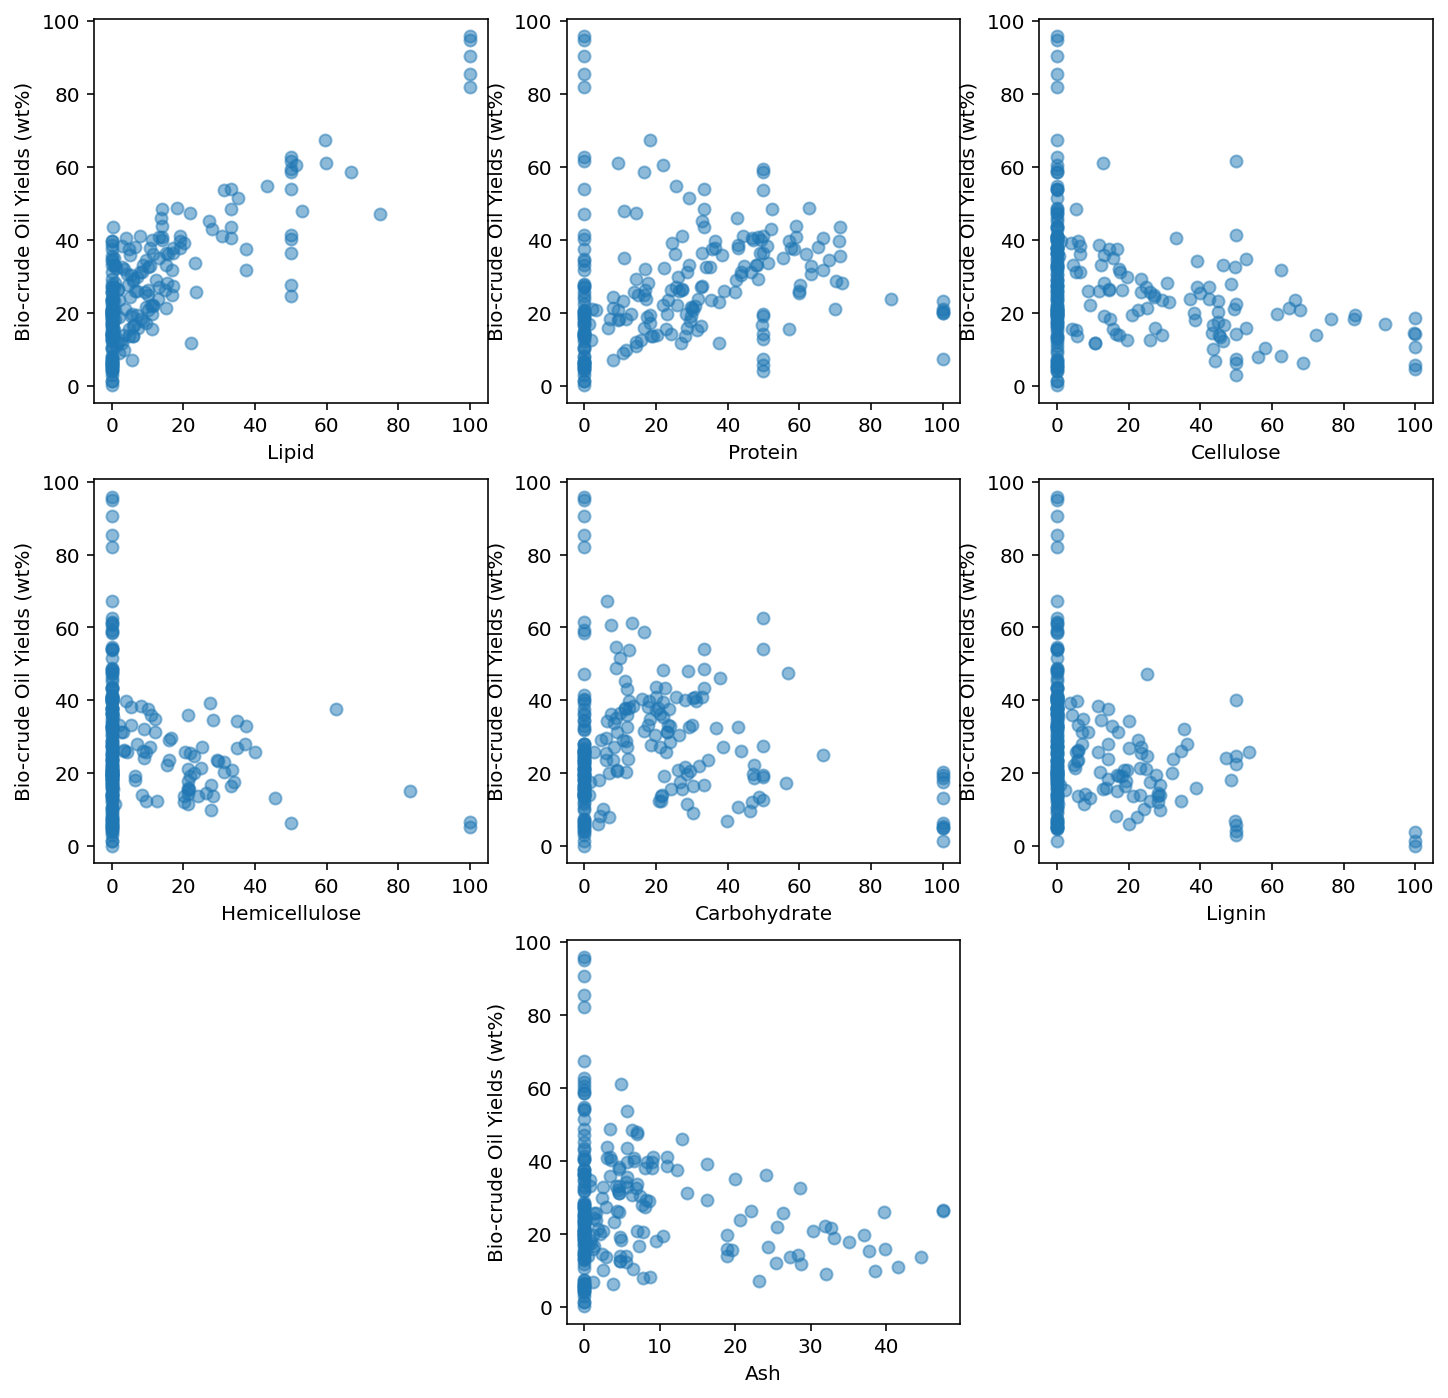

In [ ]:
# Load matplotlib
import matplotlib.pyplot as plt

# Show the figure with higher resolution
%config InlineBackend.figure_format = 'retina'

# Adjust the size of figure
plt.figure(figsize=(12,12))

plt.subplot(331)
plt.xlabel('Lipid')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Lipid'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(332)
plt.xlabel('Protein')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Protein'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(333)
plt.xlabel('Cellulose')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Cellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(334)
plt.xlabel('Hemicellulose')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Hemicellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(335)
plt.xlabel('Carbohydrate')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Carbohydrate'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(336)
plt.xlabel('Lignin')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Lignin'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(338)
plt.xlabel('Ash')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Ash'],data['Bio-crude Oil Yield'],alpha = 0.5)
plt.show()

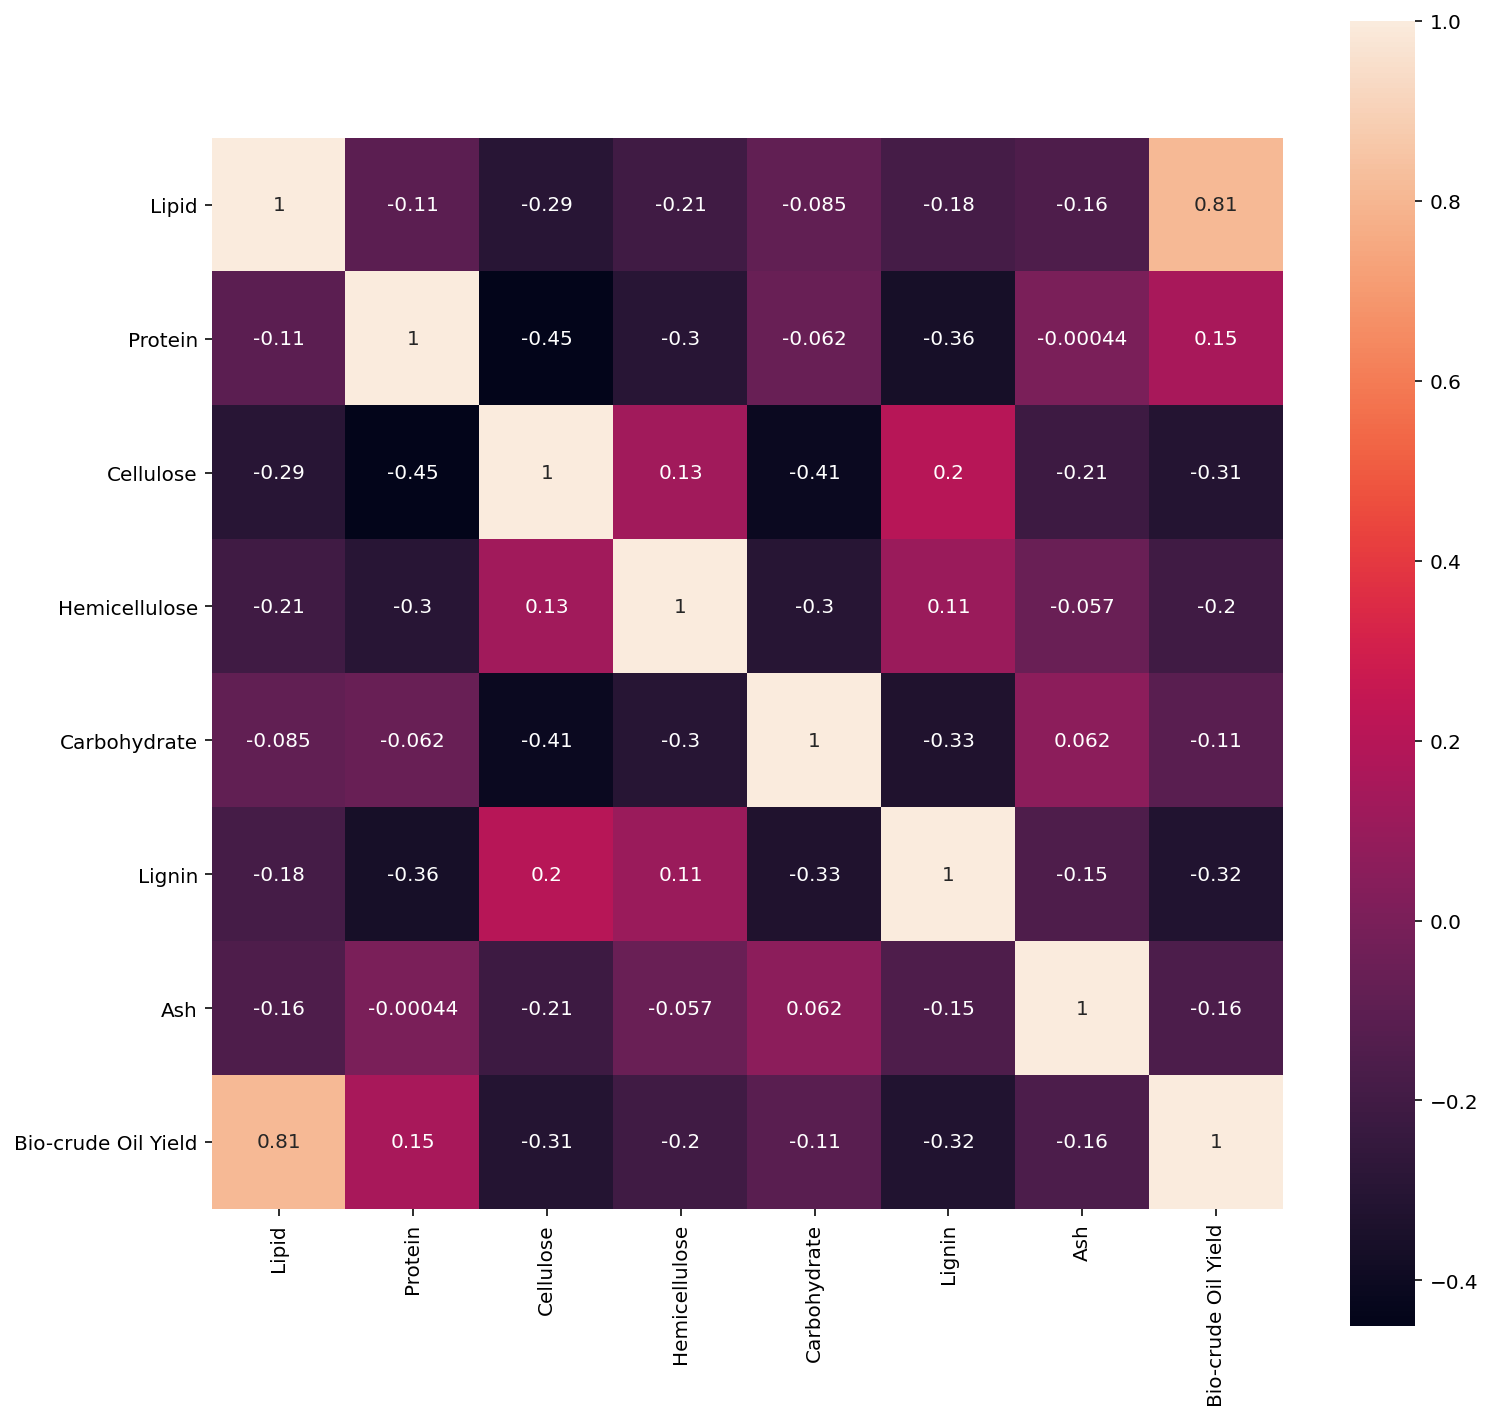

In [ ]:
# Correlation
import seaborn as sns
fig=plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True)
plt.show()

In [2]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)

In [ ]:
# No use now.
#written by Wenjing.
#apply multi-layer perceptron to data
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
#https://scikit-learn.org/stable/modules/neural_networks_supervised.html

# Lets split the data into 10 folds. 
from sklearn.model_selection import KFold
kf =KFold(n_splits=10, shuffle=True, random_state=262)

# R2_all=[]
mape_all=[]
mape_train_all=[]
mape_rfr_all=[]
y_test_list=[]
y_pred_list=[]
for train_index, test_index in kf.split(Features, Oil_Yields):
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    #random forest regressor
    rfr=RandomForestRegressor(max_depth=4, n_estimators=100,random_state=262).fit(X_train, y_train)
    y_pred_rfr=rfr.predict(X_test)
    mape_rfr=mean_absolute_percentage_error(y_test, y_pred_rfr)
    mape_rfr_all.append(mape_rfr)
    
    #multi-layer perceptron (an example of ANN)
    mlpr = MLPRegressor(random_state=262, hidden_layer_sizes=(100,),max_iter=500, 
                       learning_rate_init=0.001,early_stopping=True).fit(X_train, y_train)
    y_pred=mlpr.predict(X_test)
#     R2=regr.score(X_test, y_test)
#     R2_all.append(R2)
    mape=mean_absolute_percentage_error(y_test, y_pred) #test error
    mape_all.append(mape) #test error for all folds
    mape_train=mean_absolute_percentage_error(y_train, mlpr.predict(X_train)) #training error
    mape_train_all.append(mape_train) #training error for all folds
    
    y_test_list.append(y_test.values)
    y_pred_list.append(y_pred)
    
print("MAPE (test) from MLP",mape_all)
print("MAPE (train) from MLP",mape_train_all)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)
# print("y_true", y_test_all)
# print("y_pred", y_pred_all)

In [3]:
#apply multi-layer perceptron to data
from sklearn.neural_network import MLPRegressor
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html

# TODO: Import 'KFold'
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 69)
data['random'] = np.random.random(size = len(data))

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)

# Lets split the data into 5 folds.  
kf =KFold(n_splits=5, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    #multi-layer perceptron (an example of ANN)
    mlpr = MLPRegressor(hidden_layer_sizes=(100,),max_iter=500, 
                       learning_rate_init=0.001,early_stopping=True)
    # Model training
    mlpr.fit(X_train,y_train)

    # Predict training set and test set
    y_train_predict = mlpr.predict(X_train)
    y_test_predict = mlpr.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)

    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1

    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

#print(len(np.concatenate(y_test_list, axis=0)))
#print(len(np.concatenate(y_pred_list, axis=0)))

print("")
# Predict validation set
y_valid_predict = mlpr.predict(X_valid)

MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
r2_valid = metrics.r2_score(y_valid, y_valid_predict)
MRE_valid = performance_metric(y_valid, y_valid_predict)

print("Optimal model has MAE of valid set:", MAE_valid)
print("Optimal model has RMSE of valid set:", y_valid_rmse)
print("Optimal model has R2 score of valid set", r2_valid)
print("Optimal model has MRE of valid set:", MRE_valid)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Mean value of MAE of training set 5.585307212413426
Standard deviation of MAE of training set 0.8666796698925868
Mean value of MAE of test set 6.847603658169222
Standard deviation of MAE of test set 0.6370263192436539

Mean value of RMSE of training set 6.962215247603521
Standard deviation of RMSE of training set 0.9719969005887661
Mean value of RMSE of test set 8.648113984433209
Standard deviation of RMSE of test set 0.9390834070974181

Mean value of R2 of training set 0.8316890153349865
Standard deviation of R2 of training set 0.04327213648669372
Mean value of R2 of test set 0.6921856764701433
Standard deviation of R2 of test set 0.14045310816428938

Mean value of MRE of training set 0.2023428487806734
Standard deviation of MRE of training set 0.031247556832916083
Mean value of MRE of test set 0.24887886551140462
Standard deviation of MRE of test set 0.027104953933844274

Optimal model has MAE of valid set: 8.10957794408993
Optimal model has RMSE of valid set: 9.872729961166797
Optim

Text(0.5, 1.0, 'y_pred vs. y_true')

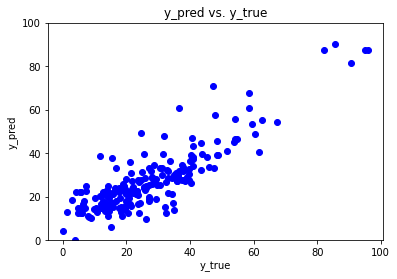

In [4]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_ANN.csv', index = False, header=True)

Text(0.5, 1.0, 'y_pred vs. y_true')

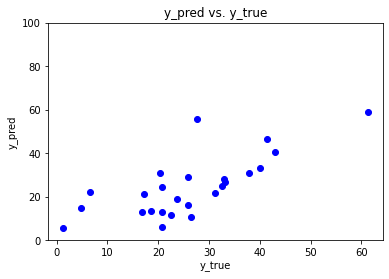

In [5]:
import matplotlib.pyplot as py
py.plot(y_valid, y_valid_predict, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
# hidden_layer_sizes 参数的最佳取值(1, 201, 1)

for i in range(1, 201, 1):
  #apply multi-layer perceptron to data
  from sklearn.neural_network import MLPRegressor
  # https://scikit-learn.org/stable/modules/neural_networks_supervised.html
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 69)
  data['random'] = np.random.random(size = len(data))

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    #multi-layer perceptron (an example of ANN)
    mlpr = MLPRegressor(hidden_layer_sizes=(i,),max_iter=500, 
                       learning_rate_init=0.001,early_stopping=True)
    # Model training
    mlpr.fit(X_train,y_train)
    
    y_train_predict = mlpr.predict(X_train)
    y_test_predict = mlpr.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)

  # Predict validation set
  y_valid_predict = mlpr.predict(X_valid)
  
  MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
  y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)
  MRE_valid = performance_metric(y_valid, y_valid_predict)

  SD = ((np.mean(r2_train_all)-np.mean(r2_test_all))**2+(np.mean(r2_train_all)-r2_valid)**2+(r2_valid-np.mean(r2_test_all))**2)**0.5

  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print(SD)

In [ ]:
# max_iter 参数的最佳取值(100, 1000, 100)

for i in range(100, 1000, 100):
  #apply multi-layer perceptron to data
  from sklearn.neural_network import MLPRegressor
  # https://scikit-learn.org/stable/modules/neural_networks_supervised.html
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 69)
  data['random'] = np.random.random(size = len(data))

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    #multi-layer perceptron (an example of ANN)
    mlpr = MLPRegressor(hidden_layer_sizes=(16,),max_iter=i, 
                       learning_rate_init=0.001,early_stopping=True)
    # Model training
    mlpr.fit(X_train,y_train)
    
    y_train_predict = mlpr.predict(X_train)
    y_test_predict = mlpr.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)

  # Predict validation set
  y_valid_predict = mlpr.predict(X_valid)
  
  MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
  y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)
  MRE_valid = performance_metric(y_valid, y_valid_predict)

  SD = ((np.mean(r2_train_all)-np.mean(r2_test_all))**2+(np.mean(r2_train_all)-r2_valid)**2+(r2_valid-np.mean(r2_test_all))**2)**0.5

  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print(SD)

In [ ]:
# learning_rate_init 参数的最佳取值(0.0005, 0.002, 0.0001)

for i in range(5, 20, 1):
  #apply multi-layer perceptron to data
  from sklearn.neural_network import MLPRegressor
  # https://scikit-learn.org/stable/modules/neural_networks_supervised.html
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 69)
  data['random'] = np.random.random(size = len(data))

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    #multi-layer perceptron (an example of ANN)
    mlpr = MLPRegressor(hidden_layer_sizes=(16,),max_iter=500, 
                       learning_rate_init=i/10000,early_stopping=True)
    # Model training
    mlpr.fit(X_train,y_train)
    
    y_train_predict = mlpr.predict(X_train)
    y_test_predict = mlpr.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)

  # Predict validation set
  y_valid_predict = mlpr.predict(X_valid)
  
  MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
  y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)
  MRE_valid = performance_metric(y_valid, y_valid_predict)

  SD = ((np.mean(r2_train_all)-np.mean(r2_test_all))**2+(np.mean(r2_train_all)-r2_valid)**2+(r2_valid-np.mean(r2_test_all))**2)**0.5

  print(i/10000)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Optimal model has R2 score of valid set", r2_valid)
  print(SD)

In [10]:
#apply multi-layer perceptron to data
from sklearn.neural_network import MLPRegressor
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html

# TODO: Import 'KFold'
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 69)
data['random'] = np.random.random(size = len(data))

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields,test_size = 0.11)

# Lets split the data into 5 folds.  
kf =KFold(n_splits=5, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    #multi-layer perceptron (an example of ANN)
    mlpr = MLPRegressor(hidden_layer_sizes=(16,),max_iter=500, 
                       learning_rate_init=0.001,early_stopping=True)
    # Model training
    mlpr.fit(X_train,y_train)

    # Predict training set and test set
    y_train_predict = mlpr.predict(X_train)
    y_test_predict = mlpr.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)

    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1

    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

#print(len(np.concatenate(y_test_list, axis=0)))
#print(len(np.concatenate(y_pred_list, axis=0)))

print("")
# Predict validation set
y_valid_predict = mlpr.predict(X_valid)

MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
r2_valid = metrics.r2_score(y_valid, y_valid_predict)
MRE_valid = performance_metric(y_valid, y_valid_predict)

print("Optimal model has MAE of valid set:", MAE_valid)
print("Optimal model has RMSE of valid set:", y_valid_rmse)
print("Optimal model has R2 score of valid set", r2_valid)
print("Optimal model has MRE of valid set:", MRE_valid)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Mean value of MAE of training set 6.506820787630694
Standard deviation of MAE of training set 0.22595081285097374
Mean value of MAE of test set 7.105479093451068
Standard deviation of MAE of test set 0.5407834721538609

Mean value of RMSE of training set 8.113927673312567
Standard deviation of RMSE of training set 0.17502205433063758
Mean value of RMSE of test set 8.741166480888316
Standard deviation of RMSE of test set 0.5427446733622106

Mean value of R2 of training set 0.7730422041264
Standard deviation of R2 of training set 0.025958168785188848
Mean value of R2 of test set 0.6986104607674081
Standard deviation of R2 of test set 0.10204431866803523

Mean value of MRE of training set 0.23579369991520488
Standard deviation of MRE of training set 0.008421779623150648
Mean value of MRE of test set 0.25760050334815804
Standard deviation of MRE of test set 0.015592621773296862

Optimal model has MAE of valid set: 5.7041572230916024
Optimal model has RMSE of valid set: 6.908872828014332
Op

Text(0.5, 1.0, 'y_pred vs. y_true')

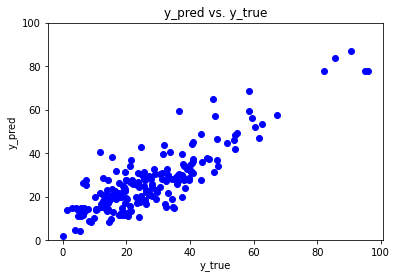

In [11]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_ANN_Opt.csv', index = False, header=True)

Text(0.5, 1.0, 'y_pred vs. y_true')

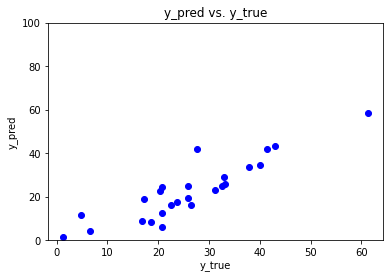

In [12]:
import matplotlib.pyplot as py
py.plot(y_valid, y_valid_predict, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')